# Game of Life

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2019 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The following class implements the Game of Life.

In [2]:
from scipy.signal import correlate2d
from time import sleep
from IPython.display import clear_output

class Life:
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def __init__(self, n, m=None):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.grid = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.

        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.grid[row+i, col:col+len(s)] = np.array([int(b) for b in s])
            
    def step(self):
        """Executes one time step."""
        c = correlate2d(self.grid, self.kernel, mode='same')
        self.grid = self.table[c]
        
    def draw(self):
        """Draws the cells."""
        
        a = self.grid

        n, m = a.shape
        plt.axis([0, m, 0, n])
        plt.xticks([])
        plt.yticks([])

        cmap = plt.get_cmap('Greens')
        options = dict(interpolation='nearest', alpha=0.8,
                   vmin=0, vmax=1, origin='upper')
        options['extent'] = [0, m, 0, n]
    
        self.im = plt.imshow(a, cmap, **options)

    def animate(self, frames, interval=None):
        """Animate the automaton.

        frames: number of frames to draw
        interval: time between frames in seconds
        """
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                self.step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass

The following function creates a `Life` object and sets the initial condition using strings of `0` and `1` characters.

In [3]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

## Game of Life entities

Under GoL rules, some configurations are stable, meaning that they don't change from one time step to the next.  These patterns are sometimes called "still lifes".

One example is a "beehive", which is the following pattern of 6 cells.

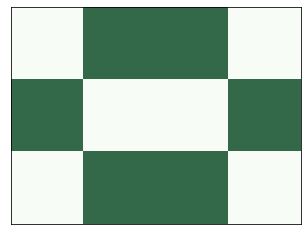

In [4]:
# beehive
life = make_life(3, 4, 0, 0, '0110', '1001', '0110')
life.draw()

Here's what it looks like after one step:

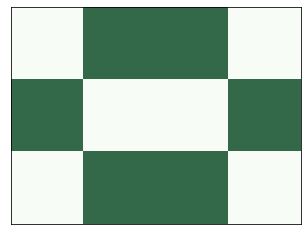

In [5]:
life.step()
life.draw()

Some patterns, called "oscillators", cycle through a series of configurations that returns to the initial configuration and repeats.

A "toad" is an oscillator with period 2.  Here's are its two configurations:

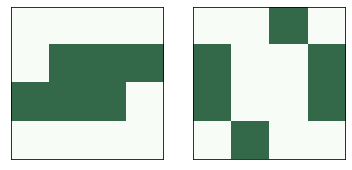

In [6]:
# toad
plt.subplot(1, 2, 1)
life = make_life(4, 4, 1, 0, '0111', '1110')
life.draw()

plt.subplot(1, 2, 2)
life.step()
life.draw()

Here's what it looks like as an animation.

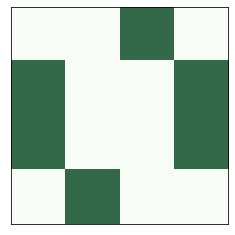

In [7]:
life.step()
life.animate(frames=4, interval=0.5)

Some patterns repeat, but after each cycle, they are offset in space.  They are called "spaceships".

A "glider" is a spaceship that translates one unit down and to the right with period 4. 

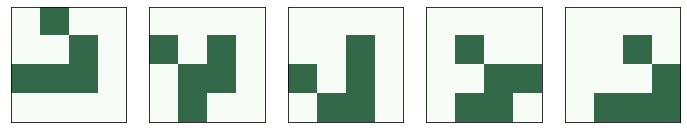

In [8]:
# glider
glider = ['010', '001', '111']
life = make_life(4, 4, 0, 0, *glider)

plt.figure(figsize=(12,5))

for i in range(1, 6):
    plt.subplot(1, 5, i)
    life.draw()
    life.step()

Here's an animation showing glider movement.

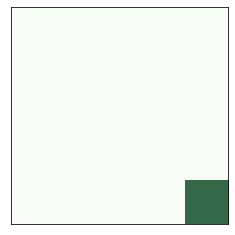

In [9]:
life = make_life(10, 10, 0, 0, '010', '001', '111')
life.animate(frames=32, interval=0.2)

**Exercise:** If you start GoL from a random configuration, it usually runs chaotically for a while and then settles into stable patterns that include blinkers, blocks, and beehives, ships, boats, and loaves.

For a list of common "natually" occurring patterns, see Achim Flammenkamp, "[Most seen natural occurring ash objects in Game of Life](http://wwwhomes.uni-bielefeld.de/achim/freq_top_life.html)",

Start GoL in a random state and run it until it stabilizes (try 1000 steps).
What stable patterns can you identify?

Hint: use `numpy.random.randint`.

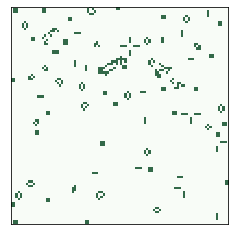

In [10]:
# Solution

n = 100
life = Life(n)
life.grid = np.random.randint(2, size=(n, n), dtype=np.uint8)
life.animate(frames=1000)

### Methuselas

Most initial conditions run for a short time and reach a steady state.  But some initial conditional run for a surprisingly long time; they are called [Methuselahs](https://en.wikipedia.org/wiki/Methuselah_(cellular_automaton))

One of the simplest examples is the "r-pentomino", which starts with only five live cells, but it runs for 1103 steps before stabilizing.

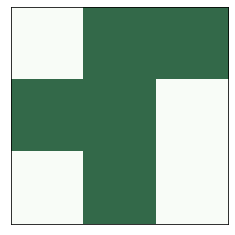

In [11]:
# r pentomino
rpent = ['011', '110', '010']
life = make_life(3, 3, 0, 0, *rpent)
life.draw()

Here are the start and finish configurations.

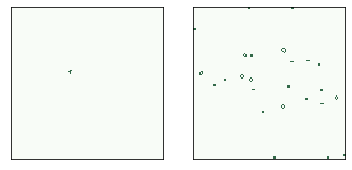

In [12]:
# r pentomino
rpent = ['011', '110', '010']

plt.subplot(1, 2, 1)
life = make_life(120, 120, 50, 45, *rpent)
life.draw()

for i in range(1103):
    life.step()

plt.subplot(1, 2, 2)
life.draw()

And here's the animation that shows the steps.

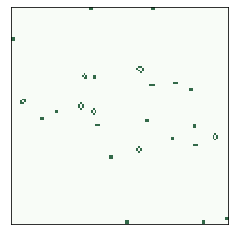

In [13]:
life = make_life(120, 120, 50, 45, *rpent)
life.animate(frames=1200)

### Rabbits

Another example is [rabbits](https://web.archive.org/web/20081221152607/http://www.argentum.freeserve.co.uk/lex_r.htm#rabbits), which starts with only nine cells and runs 17331 steps before reaching steady state.

In [19]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/ComplexityScience/raw/master/Cell2D.py')
download('https://github.com/AllenDowney/ComplexityScience/raw/master/Life.py')
download('https://github.com/AllenDowney/ComplexityScience/raw/master/LifeRabbits.py')

Downloaded Cell2D.py


To run my implementation of rabbits, open a terminal and run

```
python LifeRabbits.py
```

### Conway's conjecture

Patterns like these prompted Conway to conjecture, as a challenge, that there are no initial conditions where the number of live cells grows unboundedly.

Gosper's glider gun was the first entity to be discovered that produces an unbounded number of live cells, which refutes Conway's conjecture.

In [27]:
glider_gun = [
    '000000000000000000000000100000000000',
    '000000000000000000000010100000000000',
    '000000000000110000001100000000000011',
    '000000000001000100001100000000000011',
    '110000000010000010001100000000000000',
    '110000000010001011000010100000000000',
    '000000000010000010000000100000000000',
    '000000000001000100000000000000000000',
    '000000000000110000000000000000000000'
]

Here's the initial configuration:

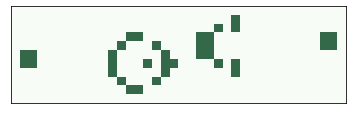

In [28]:
life = make_life(11, 38, 1, 1, *glider_gun)
life.draw()

And here's what it looks like running:

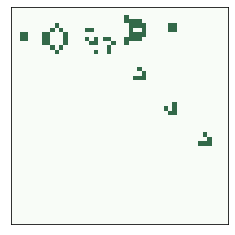

In [30]:
life = make_life(50, 50, 2, 2, *glider_gun)
life.animate(frames=500)

**Exercise:** In this animation, you might notice that the boundary interferes with the escaping gliders, but it doesn't affect the behavior of the gun.

For fun, change `step` so it passes the keywords `boundary='wrap'` to `correlate2d`, and see what happens.

Don't forget to remove it before you proceed.

### Puffer train

Another way to "refute" Conway's conjecture is a [puffer train](https://en.wikipedia.org/wiki/Puffer_train).

In [ ]:
download('https://github.com/AllenDowney/ComplexityScience/raw/master/LifePuffer.py')

To see a puffer train run, open a terminal and run

```
python LifePuffer.py
```

### Implementing Game of Life

This section explains how the implementaion we've been using works.

As an example, I'll start with an array of random cells:

In [31]:
a = np.random.randint(2, size=(10, 10), dtype=np.uint8)
print(a)

[[0 1 1 1 1 0 0 1 1 0]
 [1 1 0 1 0 1 1 1 0 1]
 [0 1 1 0 0 0 1 1 1 0]
 [0 1 0 0 1 1 1 1 0 1]
 [1 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0]
 [0 0 0 1 1 0 1 1 1 0]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 1 0 1 0 0 1 1 1]]


The following is a straightforward translation of the GoL rules using `for` loops and array slicing.

In [32]:
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

print(b)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Here's a smaller, faster version using cross correlation.

In [33]:
from scipy.signal import correlate2d

kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==2) & a
b = b.astype(np.uint8)
print(b)

[[1 1 0 1 1 1 0 1 1 0]
 [1 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 1 1]]


Using a kernel that gives a weight of 10 to the center cell, we can simplify the logic a little.

In [34]:
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==12) | (c==13)
b = b.astype(np.uint8)
print(b)

[[1 1 0 1 1 1 0 1 1 0]
 [1 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 1 1]]


More importantly, the second version of the kernel makes it possible to use a look up table to get the next state, which is faster and even more concise.

In [35]:
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1
c = correlate2d(a, kernel, mode='same')
b = table[c]
print(b)

[[1 1 0 1 1 1 0 1 1 0]
 [1 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 1 1]]


### Highlife

One variation of GoL, called "Highlife", has the
same rules as GoL, plus one additional rule: a dead cell with 6
neighbors comes to life.

You can try out different rules by inheriting from `Life` and changing the lookup table.

**Exercise:** Modify the table below to add the new rule.

In [36]:
# Starter code

class MyLife(Life):
    """Implementation of Life."""

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

One of the more interesting patterns in Highlife is the replicator, which has the following initial configuration.


In [37]:
replicator = [
    '00111',
    '01001',
    '10001',
    '10010',
    '11100'
]

Make a `MyLife` object with `n=100` and use `add_cells` to put a replicator near the middle.

Make an animation with about 200 frames and see how it behaves.

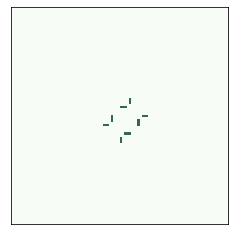

In [38]:
# Solution

n = 100
life = MyLife(n)
life.add_cells(n//2, n//2, *replicator)
life.animate(frames=200)

**Exercise:** Try out some other rules and see what kind of behavior you get.